In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt

In [4]:
# Define the dataset paths
train_dir = r"C:\Users\ElavarasiChinnadurai\OneDrive\Desktop\AI\dataset\train"
val_dir = r"C:\Users\ElavarasiChinnadurai\OneDrive\Desktop\AI\dataset\validation"

In [5]:
# Define the image dimensions
img_height, img_width = 128, 128
batch_size = 32

In [6]:
# Create data generators for training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

Found 101 images belonging to 2 classes.
Found 101 images belonging to 2 classes.


In [22]:
print(train_generator.class_indices)


{'with_mask': 0, 'without_mask': 1}


In [23]:
# Define the model architecture
from tensorflow.keras.layers import Input
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [24]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 548ms/step - accuracy: 0.5545 - loss: 4.5987 - val_accuracy: 0.5248 - val_loss: 1.3091
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 342ms/step - accuracy: 0.5446 - loss: 1.0082 - val_accuracy: 0.5644 - val_loss: 0.6447
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step - accuracy: 0.7030 - loss: 0.5642 - val_accuracy: 0.6832 - val_loss: 0.5148
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 449ms/step - accuracy: 0.7921 - loss: 0.4421 - val_accuracy: 0.8218 - val_loss: 0.3823
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 359ms/step - accuracy: 0.9109 - loss: 0.3171 - val_accuracy: 0.9208 - val_loss: 0.2570
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 407ms/step - accuracy: 0.9208 - loss: 0.2079 - val_accuracy: 0.9505 - val_loss: 0.1359
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 473ms/step - accuracy: 0.9307 - loss: 0.1625 - val_accuracy: 0.9010 - val_loss: 0.2273
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 466ms/step - accuracy: 0.9406 - loss: 0.1652 - val_accuracy: 0.8812 - val_loss:

In [26]:
# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {loss:.2f}")
print(f"Validation Accuracy: {accuracy*100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9604 - loss: 0.0697
Validation Loss: 0.07
Validation Accuracy: 96.04%


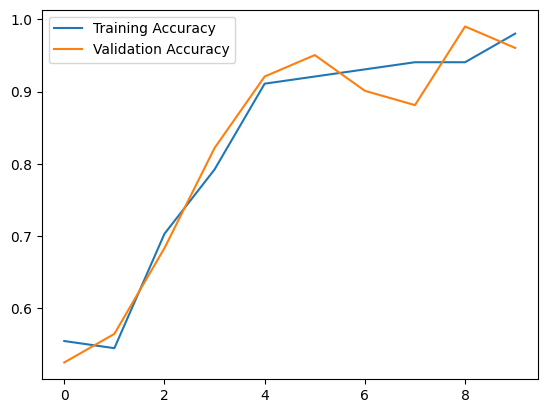

In [27]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [33]:
image_path = r"C:\Users\ElavarasiChinnadurai\OneDrive\Desktop\AI\dataset\validation\with_mask\with_mask (1748).jpg"
def predict_mask(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    pred_prob = model.predict(img)[0][0]
    # Flip the threshold direction if "with_mask" label is 0
    if pred_prob < 0.5:
        print(f"With Mask, Confidence: {(1-pred_prob)*100:.2f}%")
    else:
        print(f"Without Mask, Confidence: {pred_prob*100:.2f}%")

In [37]:
# Use the model to make predictions

image_path = r"C:\Users\ElavarasiChinnadurai\OneDrive\Desktop\AI\dataset\validation\with_mask\with_mask (1748).jpg"

def predict_mask(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128))
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    pred_prob = model.predict(img)[0][0]
    if pred_prob < 0.5:  # Changed pred to pred_prob
        print(f"With Mask, Confidence: {(1-pred_prob)*100:.2f}%")
    else:
        print(f"Without Mask, Confidence: {pred_prob*100:.2f}%")

# Test the model
predict_mask(image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
With Mask, Confidence: 99.40%


In [38]:
import cv2
import numpy as np

# Load the image
img = cv2.imread(r"C:\Users\ElavarasiChinnadurai\OneDrive\Desktop\AI\dataset\validation\without_mask\without_mask (27).jpg")
img = cv2.resize(img, (128, 128))
img = img / 255.0
img = np.expand_dims(img, axis=0)

# Make a prediction
pred = model.predict(img)

# Print the prediction
if pred > 0.5:
    print("With Mask, Confidence: {:.2f}%".format(pred[0][0]*100))
else:
    print("Without Mask, Confidence: {:.2f}%".format((1-pred[0][0])*100))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Without Mask, Confidence: 98.22%
